How does the occupancy rate of homeless shelters vary seasonally or with weather conditions?

In [16]:
import pandas as pd

# Load the CSV files from your data folder
shelter_data_2023 = pd.read_csv('data/shelter/daily-shelter-overnight-occupancy.csv')
shelter_data_2022 = pd.read_csv('data/shelter/daily-shelter-overnight-service-occupancy-capacity-2022.csv')
shelter_data_2021 = pd.read_csv('data/shelter/daily-shelter-overnight-service-occupancy-capacity-2021.csv')

# Reformat 'OCCUPANCY_DATE' in 2022 and 2021 to match '2023-01-01' style
shelter_data_2022['OCCUPANCY_DATE'] = pd.to_datetime(shelter_data_2022['OCCUPANCY_DATE'], format='%y-%m-%d').dt.strftime('%Y-%m-%d')
shelter_data_2021['OCCUPANCY_DATE'] = pd.to_datetime(shelter_data_2021['OCCUPANCY_DATE'], format='%y-%m-%d').dt.strftime('%Y-%m-%d')

# Concatenate them into one DataFrame for easier analysis
all_shelter_data = pd.concat([shelter_data_2023, shelter_data_2022, shelter_data_2021])


In [17]:
# Convert 'OCCUPANCY_DATE' to datetime format
all_shelter_data['OCCUPANCY_DATE'] = pd.to_datetime(all_shelter_data['OCCUPANCY_DATE'], format='%Y-%m-%d')

In [18]:
# Check the data type of 'OCCUPANCY_DATE' column in the concatenated DataFrame
print(all_shelter_data['OCCUPANCY_DATE'].dtype)


datetime64[ns]


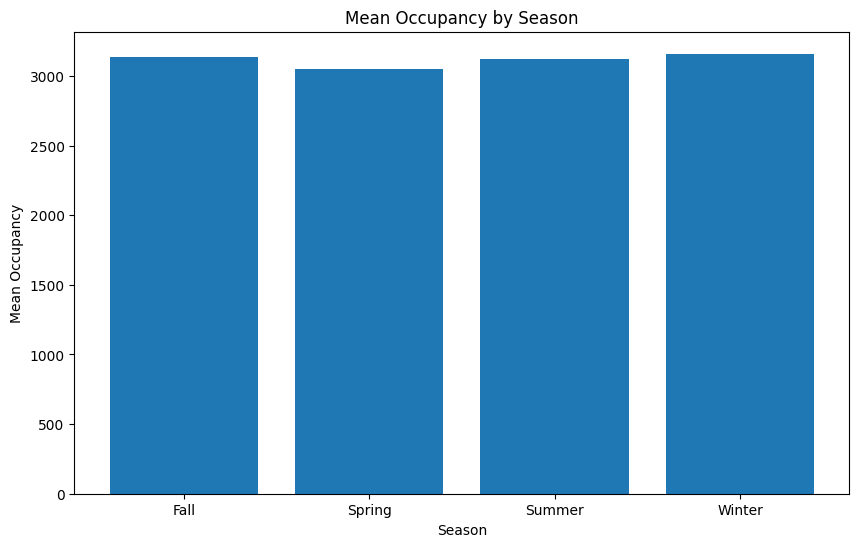

In [31]:
# Group by date and sum the occupied beds
daily_occupancy = all_shelter_data.groupby('OCCUPANCY_DATE')['OCCUPIED_BEDS'].sum().reset_index()

# Create a 'SEASON' column based on the month
daily_occupancy['SEASON'] = daily_occupancy['OCCUPANCY_DATE'].dt.month.map({
    12:'Winter', 1:'Winter', 2:'Winter',
    3:'Spring', 4:'Spring', 5:'Spring',
    6:'Summer', 7:'Summer', 8:'Summer',
    9:'Fall', 10:'Fall', 11:'Fall'
})

# Group by season and calculate the mean occupancy for each season
seasonal_occupancy = daily_occupancy.groupby('SEASON')['OCCUPIED_BEDS'].mean()

# Plot the mean occupancy for each season using matplotlib
plt.figure(figsize=(10,6))
plt.bar(x=seasonal_occupancy.index, height=seasonal_occupancy.values)
plt.title('Mean Occupancy by Season')
plt.ylabel('Mean Occupancy')
plt.xlabel('Season')
plt.show()


There is no strong relationship between the seasoon and mean occupancy.

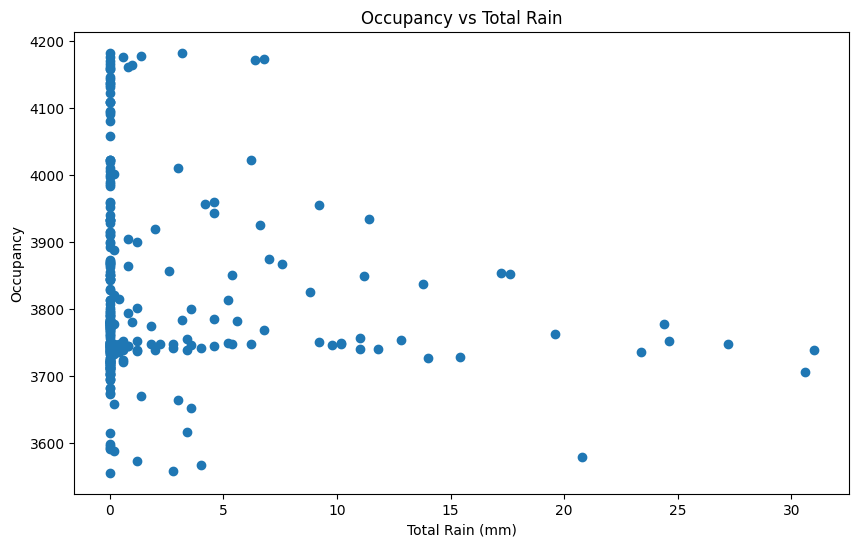

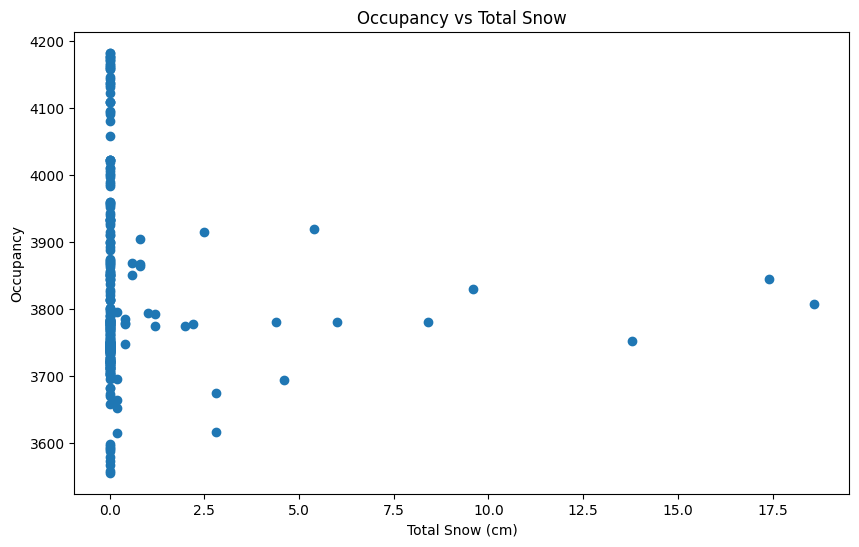

Correlation between Occupancy and Total Rain: -0.10239241488904777
Correlation between Occupancy and Total Snow: -0.0333891559265448


In [32]:
# Merge the daily_occupancy and weather tables

# Load weather data
weather_data_2023 = pd.read_csv('data/weather/weather_2023.csv')
weather_data_2022 = pd.read_csv('data/weather/weather_2022.csv')
weather_data_2021 = pd.read_csv('data/weather/weather_2021.csv')

weather_data = pd.concat([weather_data_2023, weather_data_2022, weather_data_2021])

# Convert 'DATE/TIME' to datetime format
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'], format='%Y-%m-%d')

# Merge the shelter and weather data on the date columns
merged_data = pd.merge(daily_occupancy, weather_data, left_on='OCCUPANCY_DATE', right_on='Date/Time', how='inner')

# Plotting Occupancy vs Total Rain
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Rain (mm)'], merged_data['OCCUPIED_BEDS'])
plt.title('Occupancy vs Total Rain')
plt.xlabel('Total Rain (mm)')
plt.ylabel('Occupancy')
plt.show()

# Plotting Occupancy vs Total Snow
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Snow (cm)'], merged_data['OCCUPIED_BEDS'])
plt.title('Occupancy vs Total Snow')
plt.xlabel('Total Snow (cm)')
plt.ylabel('Occupancy')
plt.show()

# Calculating correlation coefficients
correlation_rain = merged_data['OCCUPIED_BEDS'].corr(merged_data['Total Rain (mm)'])
correlation_snow = merged_data['OCCUPIED_BEDS'].corr(merged_data['Total Snow (cm)'])

print(f'Correlation between Occupancy and Total Rain: {correlation_rain}')
print(f'Correlation between Occupancy and Total Snow: {correlation_snow}')


Occupancy and Total Rain: The correlation coefficient of -0.102 indicates a slight negative relationship between shelter occupancy and total rainfall. This suggests that as the amount of rain increases, the shelter occupancy tends to decrease slightly, although the relationship is weak and may not be statistically significant.

Occupancy and Total Snow: Similarly, the correlation coefficient of -0.033 between shelter occupancy and total snowfall also indicates a weak negative relationship, though weaker than that with total rain. This implies that there is a slight tendency for shelter occupancy to decrease as snowfall increases, but again, the relationship is weak.